In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Read CSV files into dataframes
df1 = pd.read_csv('details.csv')
df2 = pd.read_csv('ratings.csv')

# Details dataset preview
df1.head()

,num,id,primary,description,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,...,boardgamefamily,boardgameexpansion,boardgameimplementation,boardgamedesigner,boardgameartist,boardgamepublisher,owned,trading,wanting,wishing
0,0,30549,Pandemic,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,45,...,"['Components: Map (Global Scale)', 'Components...",['Pandemic: Gen Con 2016 Promos – Z-Force Team...,"['Pandemic Legacy: Season 0', 'Pandemic Legacy...",['Matt Leacock'],"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...","['Z-Man Games', 'Albi', 'Asmodee', 'Asmodee It...",168364,2508,625,9344
1,1,822,Carcassonne,Carcassonne is a tile-placement game in which ...,2000,2,5,45,30,45,...,"['Cities: Carcassonne (France)', 'Components: ...","['20 Jahre Darmstadt Spielt', 'Apothecaries (f...","['The Ark of the Covenant', 'Carcassonne für 2...",['Klaus-Jürgen Wrede'],"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",161299,1716,582,7383
2,2,13,Catan,"In CATAN (formerly The Settlers of Catan), pla...",1995,3,4,120,60,120,...,"['Animals: Sheep', 'Components: Hexagonal Tile...","['20 Jahre Darmstadt Spielt', 'Brettspiel Adve...","['Baden-Württemberg Catan', 'Catan Geographies...",['Klaus Teuber'],"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...","['KOSMOS', '999 Games', 'Albi', 'Asmodee', 'As...",167733,2018,485,5890
3,3,68448,7 Wonders,You are the leader of one of the 7 great citie...,2010,2,7,30,30,30,...,"['Ancient: Babylon', 'Ancient: Egypt', 'Ancien...","['7 Wonders: Armada', '7 Wonders: Babel', '7 W...","['7 Wonders (Second Edition)', '7 Wonders Duel...",['Antoine Bauza'],"['Dimitri Chappuis', 'Miguel Coimbra', 'Etienn...","['Repos Production', 'ADC Blackfire Entertainm...",120466,1567,1010,12105
4,4,36218,Dominion,"&quot;You are a monarch, like your parents bef...",2008,2,4,30,30,30,...,"['Crowdfunding: Wspieram', 'Game: Dominion', '...","['Ancient Times (fan expansion for Dominion)',...","['Dominion (Second Edition)', 'Het Koninkrijk ...",['Donald X. Vaccarino'],"['Matthias Catrein', 'Julien Delval', 'Tomasz ...","['Rio Grande Games', '999 Games', 'Albi', 'Bar...",106956,2009,655,8621


In [2]:
# Ratings dataset preview
df2.head()

# Can identify that url & thumbnail won't be useful for analysis but can be ignored.

,num,id,name,year,rank,average,bayes_average,users_rated,url,thumbnail
0,105,30549,Pandemic,2008,106,7.59,7.487,108975,/boardgame/30549/pandemic,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...
1,189,822,Carcassonne,2000,190,7.42,7.309,108738,/boardgame/822/carcassonne,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...
2,428,13,Catan,1995,429,7.14,6.970,108024,/boardgame/13/catan,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...
3,72,68448,7 Wonders,2010,73,7.74,7.634,89982,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...
4,103,36218,Dominion,2008,104,7.61,7.499,81561,/boardgame/36218/dominion,https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...


In [3]:
# Merging both files together using merge function
df3 = pd.merge(df1, df2, on= 'id')

# Merged dataset preview
df3.head()

,num_x,id,primary,description,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,...,wishing,num_y,name,year,rank,average,bayes_average,users_rated,url,thumbnail
0,0,30549,Pandemic,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,45,...,9344,105,Pandemic,2008,106,7.59,7.487,108975,/boardgame/30549/pandemic,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...
1,1,822,Carcassonne,Carcassonne is a tile-placement game in which ...,2000,2,5,45,30,45,...,7383,189,Carcassonne,2000,190,7.42,7.309,108738,/boardgame/822/carcassonne,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...
2,2,13,Catan,"In CATAN (formerly The Settlers of Catan), pla...",1995,3,4,120,60,120,...,5890,428,Catan,1995,429,7.14,6.970,108024,/boardgame/13/catan,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...
3,3,68448,7 Wonders,You are the leader of one of the 7 great citie...,2010,2,7,30,30,30,...,12105,72,7 Wonders,2010,73,7.74,7.634,89982,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...
4,4,36218,Dominion,"&quot;You are a monarch, like your parents bef...",2008,2,4,30,30,30,...,8621,103,Dominion,2008,104,7.61,7.499,81561,/boardgame/36218/dominion,https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...


In [4]:
num_cols = df3.shape[1] # Provide the number of columns in the dataset
print(num_cols)

# See how many board games there are in the initial dataset - 21,631 games
num_rows = df3.shape[0] # Provide the number of rows in the dataset
print(num_rows)

32
21631


In [5]:
# Use RegEx to extract strings between apostrophes
unique_strings = df3['boardgamemechanic'].str.extract(r"'(.*?)'")[0]

# Changes the dataframe so that we can read the entire list and identify any mechanics which appear to be co-operative in focus
print(unique_strings.to_markdown())

#This list has a lot of repetition

|       | 0                                        |
|------:|:-----------------------------------------|
|     0 | Action Points                            |
|     1 | Area Majority / Influence                |
|     2 | Dice Rolling                             |
|     3 | Drafting                                 |
|     4 | Deck, Bag, and Pool Building             |
|     5 | Card Drafting                            |
|     6 | Communication Limits                     |
|     7 | Drafting                                 |
|     8 | Card Drafting                            |
|     9 | Advantage Token                          |
|    10 | Action Drafting                          |
|    11 | Card Drafting                            |
|    12 | Action Drafting                          |
|    13 | Area Majority / Influence                |
|    14 | Card Drafting                            |
|    15 | End Game Bonuses                         |
|    16 | Card Drafting                       

In [6]:
# Use RegEx to extract strings between apostrophes
unique_strings = df3['boardgamemechanic'].str.extract(r"'(.*?)'")[0]

# Count occurrences of each unique string
unique_strings_counts = unique_strings.value_counts()

# Changes the dataframe so that we can read the entire list and identify any mechanics which appear to be co-operative in focus
print(unique_strings_counts.to_markdown())

#Cooperative Game / 1005
#Team-Based Game / 115
#Alliances / 30
#Semi-Cooperative Game / 6
#Negotiation / 3

# Here we can identify the 5 board game mechanics that we'll be focusing on for future comparisons of Cooperative Games vs Non-Cooperative Games.

|                                          |    0 |
|:-----------------------------------------|-----:|
| Dice Rolling                             | 3413 |
| Hand Management                          | 1816 |
| Area Majority / Influence                | 1339 |
| Card Drafting                            | 1330 |
| Action Points                            | 1170 |
| Cooperative Game                         | 1005 |
| Auction/Bidding                          |  921 |
| Area Movement                            |  716 |
| Hexagon Grid                             |  572 |
| Roll / Spin and Move                     |  517 |
| Memory                                   |  428 |
| Set Collection                           |  413 |
| Action Queue                             |  375 |
| Betting and Bluffing                     |  351 |
| Pattern Building                         |  332 |
| Grid Movement                            |  326 |
| Campaign / Battle Card Driven            |  312 |
| Tile Place

In [7]:
# See how many cells show as 'NaN' in the boardgamemechanic column as we'll rely on that for our analysis
nan_count = df3['boardgamemechanic'].isna().sum()

# Print totals - NaN values in boardgamemechanic column and total number of board games
print("boardgamemechanic - NaN Total:", nan_count)
print("Total games in dataset:", num_rows)

boardgamemechanic - NaN Total: 1590
Total games in dataset: 21631


In [8]:
# NaN values for ~7.5% of the dataset is quite significant

# Will removing the games affected make our assessment biased?
# They aren't facts about individuals or performance. They are descriptors / adjectives.
# They arguably more likely to be missing for less common / older / less desirable games. Where records might not be updated or reviewed as frequently.

# Can we correctly impute responses for the boardgamemechanic column? No, they're complicated strings based on a product.

# We're not focusing our analysis on niche games or untouched records. We're looking across the total dataset.
# Suggest that NaN boardgamemechanic games are removed for the purpose of calculating %'s around co-operative games but reassessed where we aren't interested in boardgamemechanic

In [9]:
# Drop rows where boardgamemechanic is 'NaN'
df4 = df3.dropna(subset=['boardgamemechanic'])

# Confirm new total number of board games in dataset - 20,041 games
num_df4_rows = df4.shape[0]
print(num_df4_rows)

20041


In [10]:
# Order the dataframe so that we can identify which games have been rated highest by Board Game Geek members
order_df4 = df4.sort_values(by='rank')

# Preview dataframe with relevant columns
print(order_df4[['primary' , 'yearpublished', 'average' , 'bayes_average', 'users_rated' , 'boardgamemechanic']])

                                 primary  yearpublished  average  \
26                            Gloomhaven           2017     8.74   
28             Pandemic Legacy: Season 1           2015     8.59   
98                     Brass: Birmingham           2018     8.66   
7                      Terraforming Mars           2016     8.42   
199    Twilight Imperium: Fourth Edition           2017     8.68   
...                                  ...            ...      ...   
1496                               Bingo           1530     2.88   
846                           Candy Land           1949     3.18   
880                   Chutes and Ladders           -200     2.87   
1029                         Tic-Tac-Toe          -1300     2.70   
21007                  Sheep in Disguise           2022     8.86   

       bayes_average  users_rated  \
26             8.511        47827   
28             8.442        45041   
98             8.418        25484   
7              8.274        74216  

In [11]:
# Understanding how many games have co-operative game mechanics - 13.0% across all 20,041 games (2602)

# Highlight which strings we want to look for in the boardgamemechanic column (identified above)
co_op_strings = ['Cooperative Game', 'Negotiation', 'Team-Based Game', 'Alliances', 'Semi-Cooperative Game']

co_op_games = order_df4['boardgamemechanic'].str.contains('|'.join(co_op_strings))

# Count how many games can be identified as having cooperative mechanics
co_op_games_total = co_op_games.value_counts()

# Calculate the percentage of games with co-operative game mechanics to understand the representation of these mechanics vs others
co_op_percentage = (co_op_games.sum() / len(order_df4)) * 100
round_co_op_percentage = round(co_op_percentage,1)

# Print key outputs to communicate the prevalence of co-operative mechanics across entire dataset of 21,631 games
print('How many games in the dataset contain co-operative mechanics:')
print(co_op_games_total)
print()
print("Percentage of games with co-operative game mechanics", round_co_op_percentage,"%")


How many games in the dataset contain co-operative mechanics:
False    17439
True      2602
Name: boardgamemechanic, dtype: int64

Percentage of games with co-operative game mechanics 13.0 %


In [12]:
# Looking for co-op game representation in top 100 ranked games - 30% of top 100 games have co-operative mechanics (30)

# Pick the first 100 rows
first_100_rows = order_df4.head(100)

# Highlight which strings we want to look for in the boardgamemechanic column (identified above)
co_op_strings = ['Cooperative Game', 'Negotiation', 'Team-Based Game', 'Alliances', 'Semi-Cooperative Game']

# Check which games are co-operative
co_op_games = first_100_rows['boardgamemechanic'].str.contains('|'.join(co_op_strings))

# Count how many games can be identified as having cooperative mechanics
co_op_games_top_100 = co_op_games.value_counts()

# Calculate the percentage of games with co-operative game mechanics to understand the representation of these mechanics vs others
co_op_percentage = (co_op_games.sum() / len(first_100_rows)) * 100
round_co_op_percentage_top_100 = round(co_op_percentage,2)

print('How many of the top 100 ranked board games contain co-operative game mechanics')
print(co_op_games_top_100)
print()
print("Percentage of games with co-operative game mechanics", round_co_op_percentage_top_100,"%")

How many of the top 100 ranked board games contain co-operative game mechanics
False    70
True     30
Name: boardgamemechanic, dtype: int64

Percentage of games with co-operative game mechanics 30.0 %


In [13]:
# Looking for co-op game representation in top 250 ranked games - 26.8% of top 250 games have co-operative mechanics (67)

# Pick the first 250 rows
first_250_rows = order_df4.head(250)

# Highlight which strings we want to look for in the boardgamemechanic column (identified above)
co_op_strings = ['Cooperative Game', 'Negotiation', 'Team-Based Game', 'Alliances', 'Semi-Cooperative Game']

# Check which games are co-operative
co_op_games = first_250_rows['boardgamemechanic'].str.contains('|'.join(co_op_strings))

# Count how many games can be identified as having cooperative mechanics
co_op_games_top_250 = co_op_games.value_counts()

# Calculate the percentage of games with co-operative game mechanics to understand the representation of these mechanics vs others
co_op_percentage = (co_op_games.sum() / len(first_250_rows)) * 100
round_co_op_percentage_top_250 = round(co_op_percentage,2)

print('How many of the top 250 ranked board games contain co-operative game mechanics')
print(co_op_games_top_250)
print()
print("Percentage of games with co-operative game mechanics", round_co_op_percentage_top_250,"%")


How many of the top 250 ranked board games contain co-operative game mechanics
False    183
True      67
Name: boardgamemechanic, dtype: int64

Percentage of games with co-operative game mechanics 26.8 %


In [14]:
# Looking for co-op game representation in top 500 ranked games - 25.8% of top 500 games have co-operative mechanics (129)

# Pick the first 500 rows
first_500_rows = order_df4.head(500)

# Highlight which strings we want to look for in the boardgamemechanic column (identified above)
co_op_strings = ['Cooperative Game', 'Negotiation', 'Team-Based Game', 'Alliances', 'Semi-Cooperative Game']

# Check which games are co-operative
co_op_games = first_500_rows['boardgamemechanic'].str.contains('|'.join(co_op_strings))

# Count how many games can be identified as having cooperative mechanics
co_op_games_top_500 = co_op_games.value_counts()

# Calculate the percentage of games with co-operative game mechanics to understand the representation of these mechanics vs others
co_op_percentage = (co_op_games.sum() / len(first_500_rows)) * 100
round_co_op_percentage_top_500 = round(co_op_percentage,2)

print('How many of the top 500 ranked board games contain co-operative game mechanics')
print(co_op_games_top_500)
print()
print("Percentage of games with co-operative game mechanics", round_co_op_percentage_top_500,"%")

How many of the top 500 ranked board games contain co-operative game mechanics
False    371
True     129
Name: boardgamemechanic, dtype: int64

Percentage of games with co-operative game mechanics 25.8 %


In [15]:
# Looking for co-op game representation in top 1000 ranked games - 24.3% of top 1000 games have co-operative mechanics (243)

# Pick the first 1000 rows
first_1000_rows = order_df4.head(1000)

# Highlight which strings we want to look for in the boardgamemechanic column (identified above)
co_op_strings = ['Cooperative Game', 'Negotiation', 'Team-Based Game', 'Alliances', 'Semi-Cooperative Game']

# Check which games are co-operative
co_op_games = first_1000_rows['boardgamemechanic'].str.contains('|'.join(co_op_strings))

# Count how many games can be identified as having cooperative mechanics
co_op_games_top_1000 = co_op_games.value_counts()

# Calculate the percentage of games with co-operative game mechanics to understand the representation of these mechanics vs others
co_op_percentage = (co_op_games.sum() / len(first_1000_rows)) * 100
round_co_op_percentage_top_1000 = round(co_op_percentage,2)

print('How many of the top 1000 ranked board games contain co-operative game mechanics')
print(co_op_games_top_1000)
print()
print("Percentage of games with co-operative game mechanics", round_co_op_percentage_top_1000,"%")

How many of the top 1000 ranked board games contain co-operative game mechanics
False    757
True     243
Name: boardgamemechanic, dtype: int64

Percentage of games with co-operative game mechanics 24.3 %


In [16]:
print('Percentage of games with co-operative mechanics - Dataset:', round_co_op_percentage, "%")
print()
print('Percentage of games with co-operative mechanics - Top 100:', round_co_op_percentage_top_100, "%")
print('Percentage of games with co-operative mechanics - Top 250:', round_co_op_percentage_top_250, "%")
print('Percentage of games with co-operative mechanics - Top 500:', round_co_op_percentage_top_500, "%")
print('Percentage of games with co-operative mechanics - Top 1000:', round_co_op_percentage_top_1000, "%")

# From this, it's clear that there is an above average representation of board games with co-operative mechanics in approx the top 5% of board games (1000 out of 21,631).
# Co-operative games representation almost doubles when looking at top 1000 vs the whole dataset. Increasing to ~2.25x for top 100

Percentage of games with co-operative mechanics - Dataset: 13.0 %

Percentage of games with co-operative mechanics - Top 100: 30.0 %
Percentage of games with co-operative mechanics - Top 250: 26.8 %
Percentage of games with co-operative mechanics - Top 500: 25.8 %
Percentage of games with co-operative mechanics - Top 1000: 24.3 %


In [17]:
# Pivoting to second business question, is there a change in the prevalence of co-operative games over time?

# View the df
order_df4.head()

,num_x,id,primary,description,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,...,wishing,num_y,name,year,rank,average,bayes_average,users_rated,url,thumbnail
26,26,174430,Gloomhaven,Gloomhaven is a game of Euro-inspired tactica...,2017,1,4,120,60,120,...,17658,0,Gloomhaven,2017,1,8.74,8.511,47827,/boardgame/174430/gloomhaven,https://cf.geekdo-images.com/sZYp_3BTDGjh2unaZ...
28,28,161936,Pandemic Legacy: Season 1,Pandemic Legacy is a co-operative campaign gam...,2015,2,4,60,60,60,...,11729,1,Pandemic Legacy: Season 1,2015,2,8.59,8.442,45041,/boardgame/161936/pandemic-legacy-season-1,https://cf.geekdo-images.com/-Qer2BBPG7qGGDu6K...
98,98,224517,Brass: Birmingham,Brass: Birmingham is an economic strategy game...,2018,2,4,120,60,120,...,11846,2,Brass: Birmingham,2018,3,8.66,8.418,25484,/boardgame/224517/brass-birmingham,https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...
7,7,167791,Terraforming Mars,"In the 2400s, mankind begins to terraform the ...",2016,1,5,120,120,120,...,19227,3,Terraforming Mars,2016,4,8.42,8.274,74216,/boardgame/167791/terraforming-mars,https://cf.geekdo-images.com/wg9oOLcsKvDesSUdZ...
199,199,233078,Twilight Imperium: Fourth Edition,Twilight Imperium (Fourth Edition) is a game o...,2017,3,6,480,240,480,...,8984,4,Twilight Imperium: Fourth Edition,2017,5,8.68,8.262,16025,/boardgame/233078/twilight-imperium-fourth-edi...,https://cf.geekdo-images.com/_Ppn5lssO5OaildSE...


In [18]:
# Change data type so we can do <> filters
order_df4['yearpublished'] = order_df4['yearpublished'].astype(int)

# Filter the dataset to find for board games that were published in or after 1946
#bg_df stands for 'board game data frame'
bg_df = order_df4[order_df4['yearpublished'] >= 1946]

#See how many board games there are in the filtered dataset vs the original 21,631 games
num_rows = bg_df.shape[0] 
print(num_rows)


19714


In [19]:
# Filter the DataFrame to select rows where the Year column is within the range 1946 to 1955
df_one = bg_df[(bg_df['yearpublished'] >= 1946) & (bg_df['yearpublished'] <= 1955)]

print(df_one[['primary' , 'yearpublished', 'boardgamemechanic']])

                             primary  yearpublished  \
1946                        Subbuteo           1947   
80                          Scrabble           1948   
237                         Stratego           1946   
6516               APBA Pro Baseball           1951   
1468                         Careers           1955   
11337                  The Game of Y           1953   
498                     Mille Bornes           1954   
8958                            Bali           1954   
161                             Clue           1949   
9810                 Rome & Carthage           1954   
4020                       Carla Cat           1955   
12558                        Flutter           1950   
11614                        Wembley           1952   
17528                         Astron           1954   
9468                Stadium Checkers           1952   
16181                          Skunk           1953   
10677                          Scoop           1953   
11718     

In [20]:
# Identify how many boardgames from 1946-1955 were co-operative games - 1 game out of 34 games with reported mechanics (2.9%)

# Filter the DataFrame to select rows where the Year column is within the range 1946 to 1955
df_one = bg_df[(bg_df['yearpublished'] >= 1946) & (bg_df['yearpublished'] <= 1955)]

# Highlight which strings we want to look for in the boardgamemechanic column (identified above)
co_op_strings = ['Cooperative Game', 'Negotiation', 'Team-Based Game', 'Alliances', 'Semi-Cooperative Game']

# Check which games are co-operative
games_one = df_one['boardgamemechanic'].str.contains('|'.join(co_op_strings))

# Count how many games can be identified as having cooperative mechanics
games_one_co_op = games_one.value_counts()

# Calculate the percentage of games with co-operative game mechanics to understand the representation of these mechanics vs others
games_one_percentage = (games_one.sum() / len(df_one)) * 100
round_games_one_percentage = round(games_one_percentage,1)

print('How many games published between 1946 & 1955 were co-operative:')
print(games_one_co_op)
print()
print("Percentage of games with co-operative game mechanics", round_games_one_percentage,"%")

How many games published between 1946 & 1955 were co-operative:
False    33
True      1
Name: boardgamemechanic, dtype: int64

Percentage of games with co-operative game mechanics 2.9 %


In [21]:
# Identify how many boardgames from 1956-1965 were co-operative games - 12 game out of 111 games with reported mechanics (9.8%)

# Filter the DataFrame to select rows where the Year column is within the range 1956 to 1965
df_two = bg_df[(bg_df['yearpublished'] >= 1956) & (bg_df['yearpublished'] <= 1965)]

# Highlight which strings we want to look for in the boardgamemechanic column (identified above)
co_op_strings = ['Cooperative Game', 'Negotiation', 'Team-Based Game', 'Alliances', 'Semi-Cooperative Game']

# Check which games are co-operative
games_two = df_two['boardgamemechanic'].str.contains('|'.join(co_op_strings))

# Count how many games can be identified as having cooperative mechanics
games_two_co_op = games_two.value_counts()

# Calculate the percentage of games with co-operative game mechanics to understand the representation of these mechanics vs others
games_two_percentage = (games_two.sum() / len(df_two)) * 100
round_games_two_percentage = round(games_two_percentage,1)

print('How many games published between 1956 & 1965 were co-operative:')
print(games_two_co_op)
print()
print("Percentage of games with co-operative game mechanics", round_games_two_percentage,"%")

How many games published between 1956 & 1965 were co-operative:
False    111
True      12
Name: boardgamemechanic, dtype: int64

Percentage of games with co-operative game mechanics 9.8 %


In [22]:
# Identify how many boardgames from 1966-1975 were co-operative games - 18 game out of 421 games with reported mechanics (4.1%)

# Filter the DataFrame to select rows where the Year column is within the range 1966 to 1975
df_three = bg_df[(bg_df['yearpublished'] >= 1966) & (bg_df['yearpublished'] <= 1975)]

# Highlight which strings we want to look for in the boardgamemechanic column (identified above)
co_op_strings = ['Cooperative Game', 'Negotiation', 'Team-Based Game', 'Alliances', 'Semi-Cooperative Game']

# Check which games are co-operative
games_three = df_three['boardgamemechanic'].str.contains('|'.join(co_op_strings))

# Count how many games can be identified as having cooperative mechanics
games_three_co_op = games_three.value_counts()

# Calculate the percentage of games with co-operative game mechanics to understand the representation of these mechanics vs others
games_three_percentage = (games_three.sum() / len(df_three)) * 100
round_games_three_percentage = round(games_three_percentage,1)

print('How many games published between 1966 & 1975 were co-operative:')
print(games_three_co_op)
print()
print("Percentage of games with co-operative game mechanics", round_games_three_percentage,"%")

How many games published between 1966 & 1975 were co-operative:
False    421
True      18
Name: boardgamemechanic, dtype: int64

Percentage of games with co-operative game mechanics 4.1 %


In [23]:
# Identify how many boardgames from 1976-1985 were co-operative games - 57 game out of 1,027 games with reported mechanics (5.3%)

# Filter the DataFrame to select rows where the Year column is within the range 1976 to 1985
df_four = bg_df[(bg_df['yearpublished'] >= 1976) & (bg_df['yearpublished'] <= 1985)]

# Highlight which strings we want to look for in the boardgamemechanic column (identified above)
co_op_strings = ['Cooperative Game', 'Negotiation', 'Team-Based Game', 'Alliances', 'Semi-Cooperative Game']

# Check which games are co-operative
games_four = df_four['boardgamemechanic'].str.contains('|'.join(co_op_strings))

# Count how many games can be identified as having cooperative mechanics
games_four_co_op = games_four.value_counts()

# Calculate the percentage of games with co-operative game mechanics to understand the representation of these mechanics vs others
games_four_percentage = (games_four.sum() / len(df_four)) * 100
round_games_four_percentage = round(games_four_percentage,1)

print('How many games published between 1976 & 1985 were co-operative:')
print(games_four_co_op)
print()
print("Percentage of games with co-operative game mechanics", round_games_four_percentage,"%")

How many games published between 1976 & 1985 were co-operative:
False    1027
True       57
Name: boardgamemechanic, dtype: int64

Percentage of games with co-operative game mechanics 5.3 %


In [24]:
# Identify how many boardgames from 1986-1995 were co-operative games - 108 game out of 1,384 games with reported mechanics (7.2%)

# Filter the DataFrame to select rows where the Year column is within the range 1986 to 1995
df_five = bg_df[(bg_df['yearpublished'] >= 1986) & (bg_df['yearpublished'] <= 1995)]

# Highlight which strings we want to look for in the boardgamemechanic column (identified above)
co_op_strings = ['Cooperative Game', 'Negotiation', 'Team-Based Game', 'Alliances', 'Semi-Cooperative Game']

# Check which games are co-operative
games_five = df_five['boardgamemechanic'].str.contains('|'.join(co_op_strings))

# Count how many games can be identified as having cooperative mechanics
games_five_co_op = games_five.value_counts()

# Calculate the percentage of games with co-operative game mechanics to understand the representation of these mechanics vs others
games_five_percentage = (games_five.sum() / len(df_five)) * 100
round_games_five_percentage = round(games_five_percentage,1)

print('How many games published between 1986 & 1995 were co-operative:')
print(games_five_co_op)
print()
print("Percentage of games with co-operative game mechanics", round_games_five_percentage,"%")

How many games published between 1986 & 1995 were co-operative:
False    1384
True      108
Name: boardgamemechanic, dtype: int64

Percentage of games with co-operative game mechanics 7.2 %


In [25]:
# Identify how many boardgames from 1996-2005 were co-operative games - 185 game out of 2,742 games with reported mechanics (6.3%)

# Filter the DataFrame to select rows where the Year column is within the range 1996 to 2005
df_six = bg_df[(bg_df['yearpublished'] >= 1996) & (bg_df['yearpublished'] <= 2005)]

# Highlight which strings we want to look for in the boardgamemechanic column (identified above)
co_op_strings = ['Cooperative Game', 'Negotiation', 'Team-Based Game', 'Alliances', 'Semi-Cooperative Game']

# Check which games are co-operative
games_six = df_six['boardgamemechanic'].str.contains('|'.join(co_op_strings))

# Count how many games can be identified as having cooperative mechanics
games_six_co_op = games_six.value_counts()

# Calculate the percentage of games with co-operative game mechanics to understand the representation of these mechanics vs others
games_six_percentage = (games_six.sum() / len(df_six)) * 100
round_games_six_percentage = round(games_six_percentage,1)

print('How many games published between 1996 & 2005 were co-operative:')
print(games_six_co_op)
print()
print("Percentage of games with co-operative game mechanics", round_games_six_percentage,"%")

How many games published between 1996 & 2005 were co-operative:
False    2742
True      185
Name: boardgamemechanic, dtype: int64

Percentage of games with co-operative game mechanics 6.3 %


In [26]:
# Identify how many boardgames from 2006-2015 were co-operative games - 747 game out of 6,275 games with reported mechanics (10.6%)

# Filter the DataFrame to select rows where the Year column is within the range 2006 to 2015
df_seven = bg_df[(bg_df['yearpublished'] >= 2006) & (bg_df['yearpublished'] <= 2015)]

# Highlight which strings we want to look for in the boardgamemechanic column (identified above)
co_op_strings = ['Cooperative Game', 'Negotiation', 'Team-Based Game', 'Alliances', 'Semi-Cooperative Game']

# Check which games are co-operative
games_seven = df_seven['boardgamemechanic'].str.contains('|'.join(co_op_strings))

# Count how many games can be identified as having cooperative mechanics
games_seven_co_op = games_seven.value_counts()

# Calculate the percentage of games with co-operative game mechanics to understand the representation of these mechanics vs others
games_seven_percentage = (games_seven.sum() / len(df_seven)) * 100
round_games_seven_percentage = round(games_seven_percentage,1)

print('How many games published between 2006 & 2015 were co-operative:')
print(games_seven_co_op)
print()
print("Percentage of games with co-operative game mechanics", round_games_seven_percentage,"%")

How many games published between 2006 & 2015 were co-operative:
False    6275
True      747
Name: boardgamemechanic, dtype: int64

Percentage of games with co-operative game mechanics 10.6 %


In [27]:
# Identify how many boardgames from 2006-2015 were co-operative games - 1,421 game out of 5,172 games with reported mechanics (21.6%)

# Filter the DataFrame to select rows where the Year column is within the range 2016 to 2025
df_eight = bg_df[(bg_df['yearpublished'] >= 2016) & (bg_df['yearpublished'] <= 2025)]

# Highlight which strings we want to look for in the boardgamemechanic column (identified above)
co_op_strings = ['Cooperative Game', 'Negotiation', 'Team-Based Game', 'Alliances', 'Semi-Cooperative Game']

# Check which games are co-operative
games_eight = df_eight['boardgamemechanic'].str.contains('|'.join(co_op_strings))

# Count how many games can be identified as having cooperative mechanics
games_eight_co_op = games_eight.value_counts()

# Calculate the percentage of games with co-operative game mechanics to understand the representation of these mechanics vs others
games_eight_percentage = (games_eight.sum() / len(df_eight)) * 100
round_games_eight_percentage = round(games_eight_percentage,1)

print('How many games published between 2016 & 2025 were co-operative:')
print(games_eight_co_op)
print()
print("Percentage of games with co-operative game mechanics", round_games_eight_percentage,"%")

How many games published between 2016 & 2025 were co-operative:
False    5172
True     1421
Name: boardgamemechanic, dtype: int64

Percentage of games with co-operative game mechanics 21.6 %


In [28]:
# Taking all the percentages and preparing to make a chart with them

# Create a specific dataframe that puts all the percentages in one column vs relevant range

co_op_percentages = [
    {'Range': "1946-1955", 'Percentage': 2.1},
    {'Range': "1956-1965", 'Percentage': 9.8},
    {'Range': "1966-1975", 'Percentage': 4.1},
    {'Range': "1976-1985", 'Percentage': 5.3},
    {'Range': "1986-1995", 'Percentage': 7.2},
    {'Range': "1996-2005", 'Percentage': 6.3},
    {'Range': "2006-2015", 'Percentage': 10.6},
    {'Range': "2016-2025", 'Percentage': 21.6},
]
table_df = pd.DataFrame(co_op_percentages)

# Show output
print(table_df)


       Range  Percentage
0  1946-1955         2.1
1  1956-1965         9.8
2  1966-1975         4.1
3  1976-1985         5.3
4  1986-1995         7.2
5  1996-2005         6.3
6  2006-2015        10.6
7  2016-2025        21.6


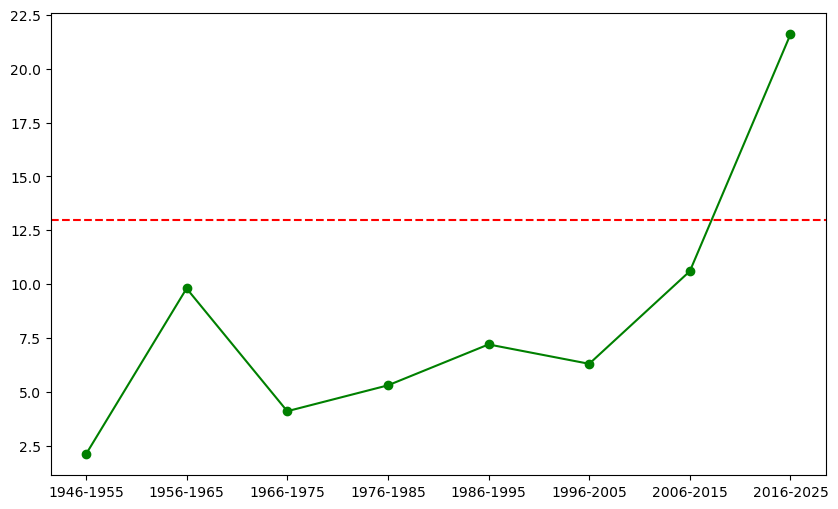

In [29]:
# Use matplotlib to create a line graph demonstrating the prevalence of co-operative board games in the dataset over time.
plt.figure(figsize=(10, 6)) 
plt.plot(table_df['Range'], table_df['Percentage'], marker='o', color='g', linestyle='-')

# Adding a constant line to represent the 13.0% mean average representation of co-operative games throughout the whole dataset
plt.axhline(y=13, color='r', linestyle='--')

In [30]:
# Pivoting to third business question, which games do people want to receive / which games are currently desirable?
# Are co-operative games currently more desirable than the norm?

# Trading - members willing to trade away a game 
# Wanting - members wanting to buy this game for themselves
# Wishing - members wanting to receive this game as a gift

# View the df
order_df4.head()

,num_x,id,primary,description,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,...,wishing,num_y,name,year,rank,average,bayes_average,users_rated,url,thumbnail
26,26,174430,Gloomhaven,Gloomhaven is a game of Euro-inspired tactica...,2017,1,4,120,60,120,...,17658,0,Gloomhaven,2017,1,8.74,8.511,47827,/boardgame/174430/gloomhaven,https://cf.geekdo-images.com/sZYp_3BTDGjh2unaZ...
28,28,161936,Pandemic Legacy: Season 1,Pandemic Legacy is a co-operative campaign gam...,2015,2,4,60,60,60,...,11729,1,Pandemic Legacy: Season 1,2015,2,8.59,8.442,45041,/boardgame/161936/pandemic-legacy-season-1,https://cf.geekdo-images.com/-Qer2BBPG7qGGDu6K...
98,98,224517,Brass: Birmingham,Brass: Birmingham is an economic strategy game...,2018,2,4,120,60,120,...,11846,2,Brass: Birmingham,2018,3,8.66,8.418,25484,/boardgame/224517/brass-birmingham,https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...
7,7,167791,Terraforming Mars,"In the 2400s, mankind begins to terraform the ...",2016,1,5,120,120,120,...,19227,3,Terraforming Mars,2016,4,8.42,8.274,74216,/boardgame/167791/terraforming-mars,https://cf.geekdo-images.com/wg9oOLcsKvDesSUdZ...
199,199,233078,Twilight Imperium: Fourth Edition,Twilight Imperium (Fourth Edition) is a game o...,2017,3,6,480,240,480,...,8984,4,Twilight Imperium: Fourth Edition,2017,5,8.68,8.262,16025,/boardgame/233078/twilight-imperium-fourth-edi...,https://cf.geekdo-images.com/_Ppn5lssO5OaildSE...


In [31]:
# See how many cells show as 'NaN' in the trading / wanting / wishing columns - understand whether further cleansing steps need to be taken.
trading_nan_count = df3['trading'].isna().sum()
wanting_nan_count = df3['wanting'].isna().sum()
wishing_nan_count = df3['wishing'].isna().sum()

# Print totals - NaN values for relevant columns and total number of board games
print("trading - NaN Total:", trading_nan_count)
print("wanting - NaN Total:", wanting_nan_count)
print("wishing - NaN Total:", wishing_nan_count)
print("Total games in dataset:", num_rows)

# All three columns are complete and have no NaN values

trading - NaN Total: 0
wanting - NaN Total: 0
wishing - NaN Total: 0
Total games in dataset: 19714


In [32]:
# Change data type so we can do <> filters
order_df4['wishing'] = order_df4['wishing'].astype(int)

In [33]:
order_df4['wanting'] = order_df4['wanting'].astype(int)

In [34]:
order_df4['trading'] = order_df4['trading'].astype(int)

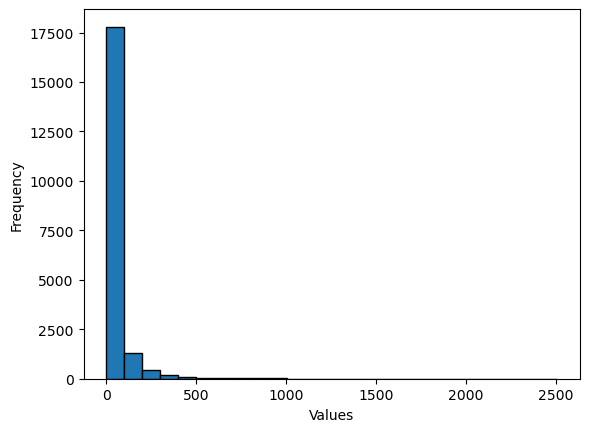

In [47]:
trading = order_df4['trading']

# Create histogram to view the range of Trades being propsoed
plt.hist(trading, bins=25, edgecolor='black') 
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()

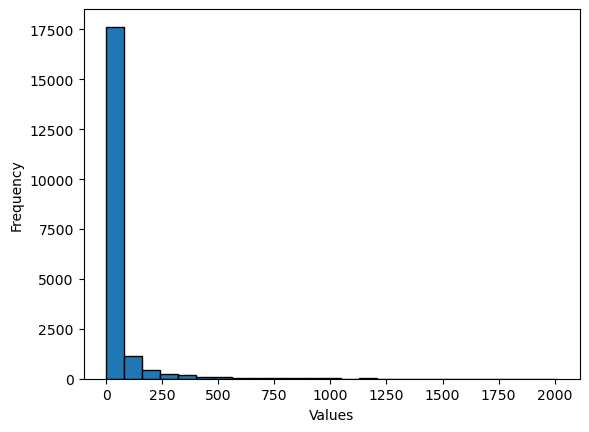

In [48]:
wanting = order_df4['wanting']

# Create histogram for Wanting - compare to Trading histogram in case representation is different
plt.hist(wanting, bins=25, edgecolor='black') 
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()

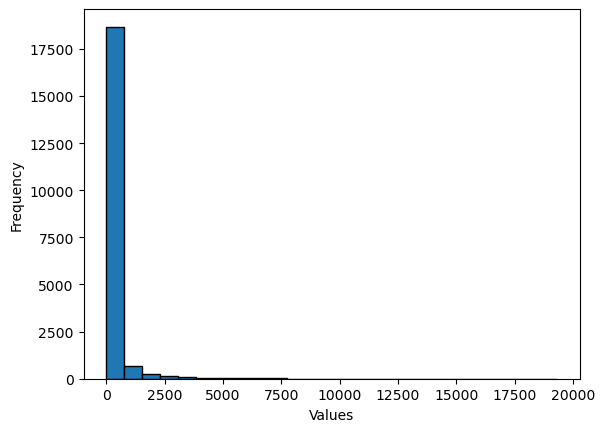

In [49]:
wishing = order_df4['wishing']

# Create histogram for Wishing - compare to Trade & Want
plt.hist(wishing, bins=25, edgecolor='black') 
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()

# Distribution of trading / wanting / wishing on the surface appears to be very similar.

In [38]:
# What is the norm when it comes to Trading / Wanting / Wishing? For an average game, how many people trade/want/wish it?

minimum = min(trading)
maximum = max(trading)
mean = np.mean(trading)
median = np.median(trading)

minimumtwo = min(wanting)
maximumtwo = max(wanting)
meantwo = np.mean(wanting)
mediantwo = np.median(wanting)

minimumthree = min(wishing)
maximumthree = max(wishing)
meanthree = np.mean(wishing)
medianthree = np.median(wishing)

print("Trading")
print("Minimum:", minimum)
print("Maximum:", maximum)
print("Mean:", mean)
print("Median:", median)
print()
print("Wanting")
print("Minimum:", minimumtwo)
print("Maximum:", maximumtwo)
print("Mean:", meantwo)
print("Median:", mediantwo)
print()
print("Wishing")
print("Minimum:", minimumthree)
print("Maximum:", maximumthree)
print("Mean:", meanthree)
print("Median:", medianthree)

# Means present a picture that approx 5.5x more people 'wish' for games vs 'trade' or 'want'
# Medians present a picture that approx 3.1 more people 'wish' for games vs 'trade'
# Medians also present that more people intend to trade a typical game vs 'want' a typical game
# Considering the significant range of the 'wishing' field and the significant left-hand skews to each of the above histograms, median is perhaps a fairer metric of comparison

Trading
Minimum: 0
Maximum: 2508
Mean: 45.81642632603163
Median: 14.0

Wanting
Minimum: 0
Maximum: 2011
Mean: 44.75649917668779
Median: 10.0

Wishing
Minimum: 0
Maximum: 19325
Mean: 249.7797515094057
Median: 44.0


In [39]:
# Is this different for co-operative games?
# Are those medians (and means) higher? 
# Do more members currently 'want' co-operative games vs intend to 'trade' them away?
# Is the ratio between 'wish' and 'trade'even more pronounced? (If it's higher than 3.1, we can arguably intuit that co-operative games are currently more desirable than the norm)

# Highlight which strings we want to look for in the boardgamemechanic column (identified above)
co_op_strings = ['Cooperative Game', 'Negotiation', 'Team-Based Game', 'Alliances', 'Semi-Cooperative Game']

# Check which games are co-operative
co_op_games_ratio = order_df4[order_df4['boardgamemechanic'].str.contains('|'.join(co_op_strings))]
                              
trade_mean = co_op_games_ratio['trading'].mean()
trade_median = co_op_games_ratio['trading'].median()

want_mean = co_op_games_ratio['wanting'].mean()
want_median = co_op_games_ratio['wanting'].median()

wish_mean = co_op_games_ratio['wishing'].mean()
wish_median = co_op_games_ratio['wishing'].median()

print("Trading")
print("Mean:", trade_mean)
print("Median:", trade_median)
print()
print("Wanting")
print("Mean:", want_mean)
print("Median:", want_median)
print()
print("Wishing")
print("Mean:", wish_mean)
print("Median:", wish_median)
print()

# All means & medians are higher than the overall pool
# Mean presents a picture that approx 7x more people 'wish' for co-operative games vs 'trade' or 'want'
# Medians present a picture that approx 6x more people 'wish' for co-operative games vs 'trade'
# Medians also present that more people now 'want' co-operative games vs intending to 'trade' them away. A reverse vs the whole dataset average (albeit not quite as pronounced)

# Across the board, these averages seem to indicate that co-operative games stand out from the general dataset as being more sought after at the moment.

Trading
Mean: 68.11606456571867
Median: 17.0

Wanting
Mean: 70.86510376633359
Median: 18.0

Wishing
Mean: 484.7794004611837
Median: 103.5



In [40]:
# Highlight the co-operative that we want to avoid whilst calculating these means / medians
co_op_strings = ['Cooperative Game', 'Negotiation', 'Team-Based Game', 'Alliances', 'Semi-Cooperative Game']

# Check which games are NOT co-operative
co_op_games_ratio = order_df4[~order_df4['boardgamemechanic'].str.contains('|'.join(co_op_strings))]
            
# Calculate means & medians for non-cooperative games to also make comparisons
trade_mean = co_op_games_ratio['trading'].mean()
trade_median = co_op_games_ratio['trading'].median()

want_mean = co_op_games_ratio['wanting'].mean()
want_median = co_op_games_ratio['wanting'].median()

wish_mean = co_op_games_ratio['wishing'].mean()
wish_median = co_op_games_ratio['wishing'].median()

print("Trading")
print("Mean:", trade_mean)
print("Median:", trade_median)
print()
print("Wanting")
print("Mean:", want_mean)
print("Median:", want_median)
print()
print("Wishing")
print("Mean:", wish_mean)
print("Median:", wish_median)
print()

# All means/medians are lower, potentially denoting a lower level of "average interest"
# Trading median is notable more pronounced vs Wanting median here. (14:9 vs 14:10 for all vs 17:18 for co-op). More people looking to trade games away.
# Medians for 'wish' and 'trade' are closer together than both co-operative games and the overall average - only 2.8x
# 

Trading
Mean: 42.48919089397328
Median: 14.0

Wanting
Mean: 40.860943861459944
Median: 9.0

Wishing
Mean: 214.7164401628534
Median: 39.0



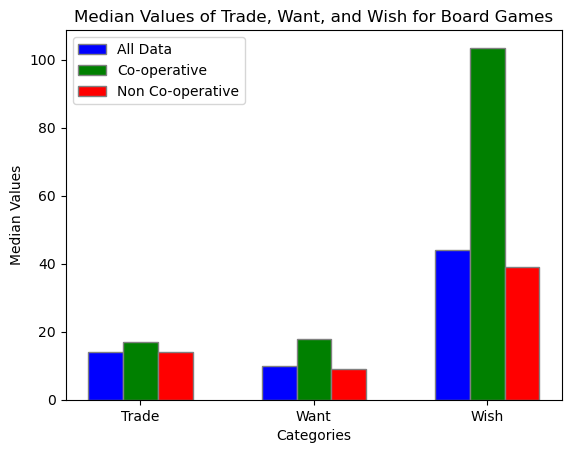

In [41]:
# Create categories that we can use in a grouped bar chart
categories = ['Trade', 'Want', 'Wish']

# Input median values (found above)
all_data_median = [14, 10, 44]
cooperative_median = [17, 18, 103.5]
non_cooperative_median = [14, 9, 39]

# Indicate how big we want the bars to be and how to space them to present a proper grouped bar chart
bar_width = 0.2
x = np.arange(len(categories))
fig, ax = plt.subplots()

r1 = x - bar_width
r2 = x
r3 = x + bar_width

# Plot the grouped bar chart
ax.bar(r1, all_data_median, color='blue', width=bar_width, edgecolor='grey', label='All Data')
ax.bar(r2, cooperative_median, color='green', width=bar_width, edgecolor='grey', label='Co-operative')
ax.bar(r3, non_cooperative_median, color='red', width=bar_width, edgecolor='grey', label='Non Co-operative')

ax.set_xlabel('Categories')
ax.set_ylabel('Median Values')
ax.set_title('Median Values of Trade, Want, and Wish for Board Games')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


plt.show()